In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

In [79]:
df = pd.read_csv(r"C:\Users\HP\Downloads\DL Practicale by samu\GOOG.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200


In [81]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [83]:
df = df[['Date','Close']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2964\2803830480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [85]:
df


,Close
Date,
2004-08-19,49.982655
2004-08-20,53.952770
2004-08-23,54.495735
2004-08-24,52.239193
2004-08-25,52.802086
...,...
2019-09-30,1219.000000
2019-10-01,1205.099976
2019-10-02,1176.630005


In [89]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])


In [93]:
scaled_data

array([[1.32809895e-04],
       [3.34030536e-03],
       [3.77897219e-03],
       ...,
       [9.10362429e-01],
       [9.19410981e-01],
       [9.36514471e-01]])

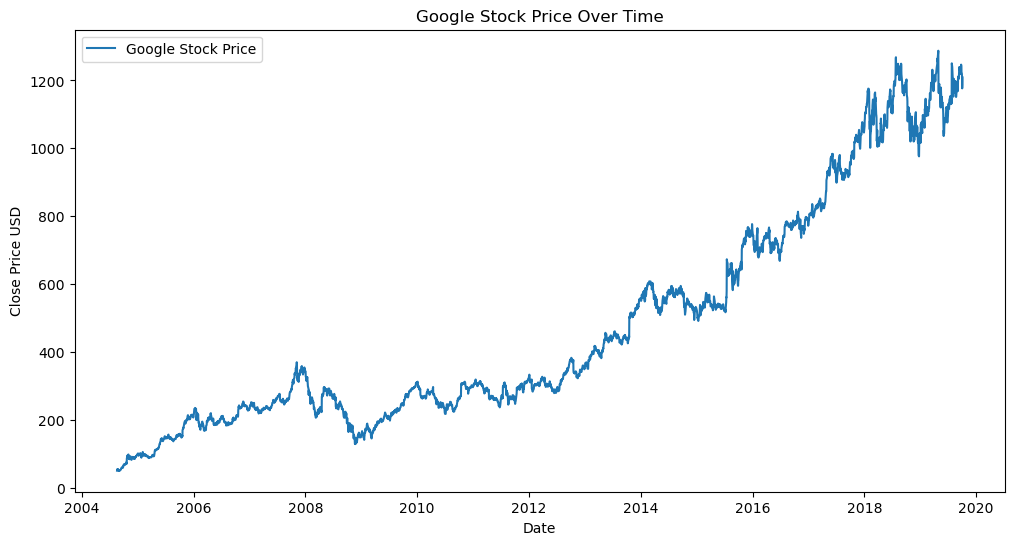

In [95]:
# Visualize the closing price
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Google Stock Price')
plt.title('Google Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()


In [99]:
def create_sequences(data, seq_length):
    x,y = [],[]
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i+seq_length])
    return np.array(x),np.array(y)

sequence_length = 60
x, y = create_sequences(scaled_data, sequence_length)

In [101]:
# Train-test split
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [103]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(sequence_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()




C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ lstm (LSTM)                   │ (None, 50)            │       10,400 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 1)             │           51 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
# Train the model
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))



Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0072 - val_loss: 5.4472e-04
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 1.1224e-04 - val_loss: 5.3227e-04
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 1.0774e-04 - val_loss: 7.5895e-04
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 1.0678e-04 - val_loss: 5.8392e-04
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 9.9952e-05 - val_loss: 5.7985e-04
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 1.0232e-04 - val_loss: 0.0010
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 9.1982e-05 - val_loss: 8.1692e-04
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 9.6381e-05 - val_loss: 6.4612e-04
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 8.4487e-05 - val_loss: 7.9378e-04
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 9.4314e-05 - val_loss: 4.2105e-04
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 9.6013e-05 - val_

In [107]:
# Predict
y_pred = model.predict(x_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [109]:
# Inverse scale predictions
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


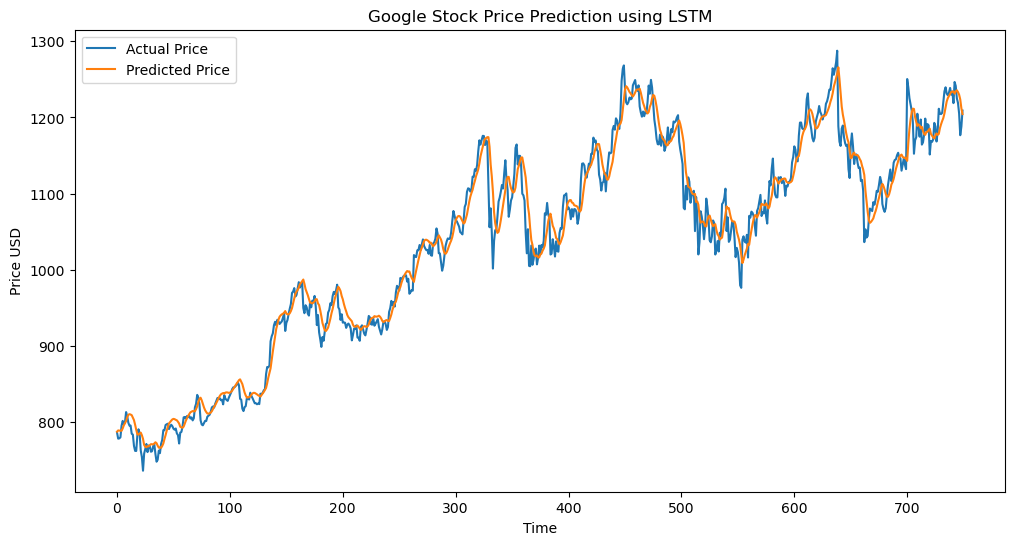

In [119]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Price')
plt.plot(y_pred_rescaled, label='Predicted Price')
plt.title('Google Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price USD')
plt.legend()
plt.show()